<a href="https://colab.research.google.com/github/mralamdari/YOLO/blob/main/Yolo_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO V2
#### yolov2 pretrained weights from [DarkNet](https://pjreddie.com/darknet/yolov2/)


#Step 0: Essentials

In [ ]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def imShow(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
#Sample Videos
# source: https://mixkit.co/
!wget https://assets.mixkit.co/videos/download/mixkit-busy-street-in-the-city-4000.mp4
!wget https://assets.mixkit.co/videos/download/mixkit-crowds-of-people-cross-a-street-junction-4401.mp4
!wget https://assets.mixkit.co/videos/download/mixkit-talented-freestyle-soccer-player-juggling-the-ball-43519.mp4

In [ ]:
#Sample Images
# source: https://pixabay.com/
!wget https://cdn.pixabay.com/photo/2016/11/23/15/32/pedestrians-1853552_960_720.jpg
!wget https://cdn.pixabay.com/photo/2017/01/28/02/24/japan-2014616_960_720.jpg
!wget https://cdn.pixabay.com/photo/2017/01/28/02/24/japan-2014617_960_720.jpg

#Step 1: Darknet
To use yolo v2 model, you can get it easily from darknet or you can create a yolo v2 model from scratch

In [ ]:
#clone Darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 15490 (delta 10), reused 22 (delta 8), pack-reused 15460
Receiving objects: 100% (15490/15490), 14.10 MiB | 15.31 MiB/s, done.
Resolving deltas: 100% (10395/10395), done.


In [ ]:
# change makefile to have gpu and opencv enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
#Build(make) Darknet
!make

#Step 2: Dataset

## Yolo with COCO Dataset
This Yolo model has been trained on COCO Dataset (as default) and has more than 80 classes.

In [ ]:
# Download Pre-trained Weights
!wget https://pjreddie.com/media/files/yolov2.weights

###Image Prediction

In [ ]:
!./darknet detect cfg/yolov2.cfg yolov2.weights data/person.jpg
imShow('predictions.jpg')

###Video Prediction

In [ ]:
output_video = '/content/results.avi'
!./darknet detector demo cfg/coco.data cfg/yolov2.cfg yolov2.weights -dont_show -i 0 -out_filename $output_video

## Yolo with Custom Dataset
Here you can add your dataset and detect the objects you desire.

### There are several ways to gather data for object detection:
#### 1. Get Pre-labeled data from Online Resources like [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)
##### 2. Download Images and Label them yourself 
(zip the images folder with labels and upload it to your Google Drive)

to get Images from [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html) and convert them to yolo's input types, use [OIDv4 ToolKit](https://github.com/mralamdari/OIDv4_ToolKit.git) that I've adjusted.

In [ ]:
#clone OIDv4_ToolKit
%cd /content/darknet
!git clone https://github.com/mralamdari/OIDv4_ToolKit.git

/content/darknet
Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 496, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 496 (delta 30), reused 0 (delta 0), pack-reused 444
Receiving objects: 100% (496/496), 34.11 MiB | 16.67 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [ ]:
#install necessary libraries
!pip3 install -r requirements.txt
!pip install awscli

In [ ]:
#Move to OIDv4_ToolKit folder
%cd OIDv4_ToolKit

#Mention the number of objects you want to train
NUM_CLASSES=2

#Write your desired objects (--classes) and data type (--type_csv)  and the number of images you want (--limit)
!python3 main.py downloader --classes Person Car --type_csv train --limit 500

/content/darknet/OIDv4_ToolKit

		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Person.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 48663 KB/s, 0 sec

###1. convert the labels in to yolo's inputs format
###2. delete the labels folder
###3. transfer '/content/darknet/OIDv4_ToolKit/OID/Dataset/{train/test}' to '/content/darknet/data/obj/{train/test}'
###4. Create obj.names in /content/darknet/data/ directory
###5. Create {train/test}.txt in /content/darknet/data/ directory

In [ ]:
!python mralamdari_annotations_converter.py

Currently in subdirectory: train
Converting annotations for class: Car
100% 500/500 [00:18<00:00, 26.39it/s]
Converting annotations for class: Person
100% 500/500 [00:24<00:00, 20.26it/s]


### Obj.data

In [ ]:
with open('/content/darknet/data/obj.data', 'w+') as obj_data:
  odata = f"""classes={NUM_CLASSES}
  train=/content/darknet/data/train.txt
  valid=/content/darknet/data/test.txt
  names=/content/darknet/data/obj.names
  backup=/content/drive/MyDrive/yolov2_backup
  """
  obj_data.write(odata)

os.makedirs('/content/drive/MyDrive/yolov2_backup', exist_ok=True)

### Adjust yolov2-custom to trainning


In [ ]:
with open('/content/darknet/cfg/yolov2.cfg', 'r+') as f:
    config_files = f.readlines()

config_files[2] = '#'+config_files[2] # batch=1
config_files[3] = '#'+config_files[3] # subdivisions=1

config_files[5] = config_files[5][2:]  # batch=64
config_files[6] = config_files[6][2:]  # subdivisions=16


max_batches = 4000 if NUM_CLASSES ==1 else NUM_CLASSES*2000
config_files[19] = f'max_batches={max_batches}\n'
config_files[21] = f'steps={max_batches*8//10},{max_batches*9//10}\n'

num=5
config_files[243] = f'classes={NUM_CLASSES}\n'
config_files[257] = 'random=1\n'
config_files[245] = f'num={num}\n'
config_files[236] = f'filters={(NUM_CLASSES+5)*num}\n'

with open('/content/darknet/cfg/yolov2-custom.cfg', 'w+') as f:
    f.writelines(config_files)

#Step 3: Model

###Get pre-trained weights for yolo

In [ ]:
%cd /content/darknet
!wget https://pjreddie.com/media/files/darknet19_448.conv.23

/content/darknet
--2022-09-10 12:31:55--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M  17.1MB/s    in 5.4s    

2022-09-10 12:32:01 (13.9 MB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



### Train from scratch

#####Use this code, so colab won't crash after being inactive for more than 10 mins;

    function ClickConnect(){
    console.log("Working"); 
    document.querySelector("colab-toolbar-button#connect").click() 
    }
    setInterval(ClickConnect,60000)

In [ ]:
#To get mAP
# !./darknet detector map /content/darknet/data/obj.data /content/darknet/cfg/yolov2-custom.cfg /content/darknet/darknet19_448.conv.23 -dont_show

!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov2-custom.cfg /content/darknet/darknet19_448.conv.23 -dont_show

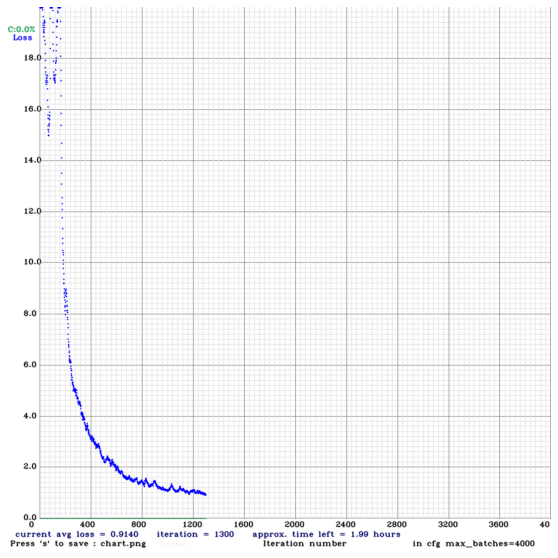

In [ ]:
imShow('chart.png')

### Train from where you ceased training with saved weights.

In [ ]:
!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov2-custom.cfg /content/drive/MyDrive/yolov2_backup/yolov2-custom_last.weights -dont_show

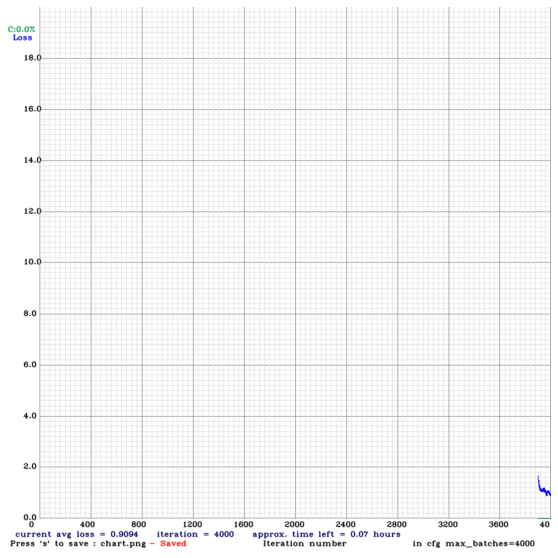

In [ ]:
imShow('chart.png')

### Adjust yolov2-custom.cfg for testing


In [ ]:
with open('/content/darknet/cfg/yolov2-custom.cfg', 'r+') as f:
    config_files = f.readlines()

config_files[5] = '#'+config_files[5] # batch=64
config_files[6] = '#'+config_files[6] # subdivisions=16

config_files[2] = config_files[2][2:]  # batch=1
config_files[3] = config_files[3][2:]  # subdivisions=1

with open('/content/darknet/cfg/yolov2-custom.cfg', 'w+') as f:
    f.writelines(config_files)

##Predict 

###Image Prediction

In [ ]:
%cd /content/darknet
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov2-custom.cfg /content/drive/MyDrive/yolov2_backup/yolov2-custom_last.weights /content/japan-2014616_960_720.jpg -thresh 0.3 -dont_show

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
batch: Using default '1'
subdivisions: Using default '1'
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x

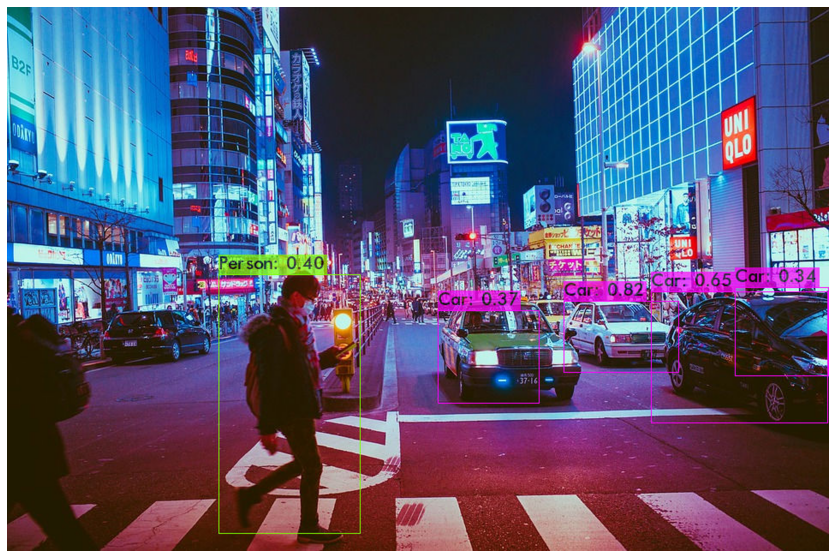

In [ ]:
imShow('predictions.jpg')

###Video Prediction

In [ ]:
%cd /content/darknet
output_video = '/content/results.avi'

!./darknet detector demo /content/darknet/data/obj.data /content/darknet/cfg/yolov2-custom.cfg /content/drive/MyDrive/yolov2_backup/yolov2-custom_last.weights /content/mixkit-busy-street-in-the-city-4000.mp4 -dont_show -i 0 -out_filename $output_video